In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

# Read the dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
#dataset = pd.read_csv("wine.data", header=None)

# Add columns,Descriptive analytics
print("Shape of the dataset: ", dataset.shape)
dataset.columns = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_ash',
                  'magnesium', 'total_phenol', 'flavanoids', 'nonflavanoid_phenols',
                  'proanthocyanins', 'color_intensity', 'hue', 'diluted_wines',
                  'proline']


# Check the imported dataset
dataset.tail(5)

Shape of the dataset:  (178, 14)


,class,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenol,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
dataset.dtypes


class                     int64
alcohol                 float64
malic_acid              float64
ash                     float64
alcalinity_ash          float64
magnesium                 int64
total_phenol            float64
flavanoids              float64
nonflavanoid_phenols    float64
proanthocyanins         float64
color_intensity         float64
hue                     float64
diluted_wines           float64
proline                   int64
dtype: object

In [6]:
dataset.isnull().sum()

class                   0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_ash          0
magnesium               0
total_phenol            0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
diluted_wines           0
proline                 0
dtype: int64

In [6]:
#heat map for correlation just to know the  quantified relation between the variable
#calculate the correlation matrix
corr = dataset.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)


#draw the correlation table 
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,class,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenol,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
class,1,-0.33,0.44,-0.05,0.52,-0.21,-0.72,-0.85,0.49,-0.5,0.27,-0.62,-0.79,-0.63
alcohol,-0.33,1,0.094,0.21,-0.31,0.27,0.29,0.24,-0.16,0.14,0.55,-0.072,0.072,0.64
malic_acid,0.44,0.094,1,0.16,0.29,-0.055,-0.34,-0.41,0.29,-0.22,0.25,-0.56,-0.37,-0.19
ash,-0.05,0.21,0.16,1,0.44,0.29,0.13,0.12,0.19,0.0097,0.26,-0.075,0.0039,0.22
alcalinity_ash,0.52,-0.31,0.29,0.44,1,-0.083,-0.32,-0.35,0.36,-0.2,0.019,-0.27,-0.28,-0.44
magnesium,-0.21,0.27,-0.055,0.29,-0.083,1,0.21,0.2,-0.26,0.24,0.2,0.055,0.066,0.39
total_phenol,-0.72,0.29,-0.34,0.13,-0.32,0.21,1,0.86,-0.45,0.61,-0.055,0.43,0.7,0.5
flavanoids,-0.85,0.24,-0.41,0.12,-0.35,0.2,0.86,1,-0.54,0.65,-0.17,0.54,0.79,0.49
nonflavanoid_phenols,0.49,-0.16,0.29,0.19,0.36,-0.26,-0.45,-0.54,1,-0.37,0.14,-0.26,-0.5,-0.31
proanthocyanins,-0.5,0.14,-0.22,0.0097,-0.2,0.24,0.61,0.65,-0.37,1,-0.025,0.3,0.52,0.33


In [7]:
wine_data_std = StandardScaler().fit_transform(dataset)

pd.DataFrame(wine_data_std).describe().transpose()

C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,count,mean,std,min,25%,50%,75%,max
0,178.0,-9.056426e-16,1.002821,-1.213944,-1.213944,0.079960,1.373864,1.373864
1,178.0,-8.619821e-16,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
2,178.0,-8.357859e-17,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
3,178.0,-8.657245e-16,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
4,178.0,-1.160121e-16,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
5,178.0,-1.995907e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
6,178.0,-2.972030e-16,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
7,178.0,-4.016762e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
8,178.0,4.079134e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
9,178.0,-1.699639e-16,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073


In [18]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X,y = dataset.iloc[:, 1:].values , dataset.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5 , random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [20]:
#cov_matrix = np.cov(wine_data_std.T)

#cov_matrix = np.cov(dataset.T)
#print('Covariance Matrix \n%s', cov_matrix)

cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.01136364  0.09092243  0.23002965 -0.43456922  0.29455589  0.45837286
   0.38059976 -0.2726185   0.2360211   0.58877151 -0.10580909  0.14468819
   0.66826692]
 [ 0.09092243  1.01136364  0.23018263  0.32706141 -0.10721153 -0.2895531
  -0.46834013  0.36792642 -0.33122663  0.29902729 -0.50657874 -0.4199617
  -0.21781971]
 [ 0.23002965  0.23018263  1.01136364  0.37478824  0.1291202   0.14278277
   0.01431417  0.22911458 -0.12432642  0.23659743 -0.20606272 -0.08492684
   0.1637024 ]
 [-0.43456922  0.32706141  0.37478824  1.01136364 -0.2543752  -0.53580856
  -0.58302975  0.49693242 -0.47556456 -0.05476143 -0.35063939 -0.45396691
  -0.59783238]
 [ 0.29455589 -0.10721153  0.1291202  -0.2543752   1.01136364  0.20341901
   0.18126552 -0.33981969  0.26697194  0.21002936 -0.0338927   0.02106938
   0.28700071]
 [ 0.45837286 -0.2895531   0.14278277 -0.53580856  0.20341901  1.01136364
   0.88220427 -0.40039966  0.59528898  0.02414881  0.43388565  0.70517106
   0.64234584]
 [

In [21]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.20002631 -0.46794146  0.00212495 -0.20316223 -0.06990281 -0.0134876
   0.14597642  0.04588521 -0.23425745 -0.0658249   0.76075935  0.14145813
   0.11525323]
 [ 0.2329795  -0.26225077 -0.14557697 -0.25751256  0.48462043 -0.60519698
   0.28405894 -0.09020087  0.01786169 -0.24683236 -0.18356659 -0.0447746
  -0.05046757]
 [ 0.04692711 -0.28833041 -0.66367043  0.35448438 -0.2117194   0.01274513
   0.063891    0.0422141   0.30309342 -0.03019734 -0.11060458  0.22351192
   0.37779058]
 [ 0.32807073  0.05668305 -0.36806112  0.26394769 -0.10093689 -0.06347755
  -0.36082809  0.01567275 -0.36814497 -0.3328708   0.22587752 -0.35177139
  -0.34389185]
 [-0.13622759 -0.23921822  0.24630896  0.7705621   0.30717427  0.00774383
   0.29399477 -0.08840424 -0.03032983  0.1502596   0.05553383 -0.11786618
  -0.20160385]
 [-0.37498067 -0.08570422 -0.2793191  -0.07056167  0.03897472 -0.12771473
  -0.06526287  0.50899354 -0.2182424   0.2908877  -0.20554893  0.27506973
  -0.48756877]
 [-0.4

In [22]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,5.220953,2.605789,1.292517,0.941104,0.674101,0.626949,0.497529,0.076423,0.164923,0.324875,0.278395,0.205412,0.238757


In [23]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 39.70992803  59.52924209  69.35997096  76.51789046  81.64502011
  86.41351615  90.19765908  92.66861806  94.78605624  96.6020127
  98.16434829  99.4187328  100.        ]


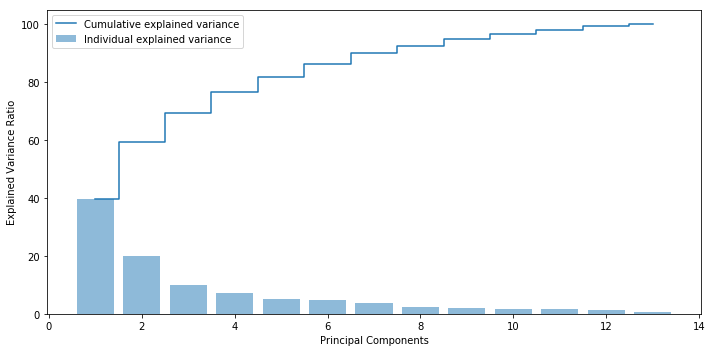

In [24]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [34]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]


# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eig_vals))]



P_reduce = np.array(eigvectors_sort[0:10]).transpose()   # Selecting first 8 eigen vectors of all 14

Proj_train_data = np.dot(X_train_std,P_reduce)   # projecting training data onto the eight eigen vectors

Proj_test_data = np.dot(X_test_std,P_reduce)    # projecting test data onto the eight eigen vectors

In [35]:
# complete matrix operation 
print(y_train.shape)
X_train_std.shape, P_reduce.shape, Proj_train_data.shape

(89,)


((89, 13), (13, 10), (89, 10))

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Proj_train_data, y_train)
#predicted_values = model.predict(Proj_test_data)

result = model.score(Proj_test_data, y_test)
print(result)

0.9438202247191011


C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
